In [7]:
using WAV;
using DSP;
using FFTW;
using Plots;
using SparseArrays;
using Statistics;
include("cqtkernel.jl");
include("cqtspectrogram.jl");

In [3]:
audio_signal, sample_rate = wavread("../data/tetris_piano_mono.wav")
audio_signal = 0.5*(audio_signal[:,1] + audio_signal[:,2]);
minimum_frequency = 55.00 / (2^(1/12));
maximum_frequency = 7040.00 * (2^(1/12));
frequency_resolution = 3;
cqt_kernel = cqtkernel(sample_rate, frequency_resolution, minimum_frequency, maximum_frequency);

In [4]:
time_resolution = minimum_frequency;
audio_spectrogram = cqtspectrogram(audio_signal,sample_rate,time_resolution,cqt_kernel);

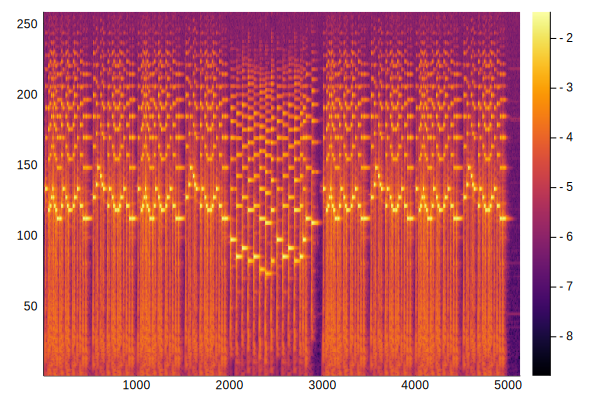

In [5]:
heatmap(log10.(audio_spectrogram))

In [9]:
q = quantile(vec(audio_spectrogram),0.98);
heatmap(audio_spectrogram, xlims=(0,1000), clims = (0,q))